1. Build a Data model in Python for the dataset chosen in Assignment 1 or 2 and apply  Linear Regression/Logistic Regression.
2. Infer the result using  accuracy score

Displaying general information

In [32]:
import pandas as pd
import numpy as np

telset = pd.read_csv('DS\\A3\\Dataset\\telecom_churn.csv')
telset

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [33]:
print("Shape of dataset\n",telset.shape)

print("\n\nDataType info\n")
print(telset.info())

Shape of dataset
 (3333, 20)


DataType info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  

Displaying summary statistics for each attribute

In [34]:
print("The statistical info of each attribute\n")
datasummary = telset.describe(include = ['int','object'])
datasummary

The statistical info of each attribute



,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [35]:
print("\nMean\n")
meanInfo = telset.mean()
meanInfo


Mean



Account length            101.064806
Area code                 437.182418
Number vmail messages       8.099010
Total day minutes         179.775098
Total day calls           100.435644
Total day charge           30.562307
Total eve minutes         200.980348
Total eve calls           100.114311
Total eve charge           17.083540
Total night minutes       200.872037
Total night calls         100.107711
Total night charge          9.039325
Total intl minutes         10.237294
Total intl calls            4.479448
Total intl charge           2.764581
Customer service calls      1.562856
Churn                       0.144914
dtype: float64

In [36]:
print("\nMedian\n")
medianInfo = telset.median()
medianInfo


Median



Account length            101.00
Area code                 415.00
Number vmail messages       0.00
Total day minutes         179.40
Total day calls           101.00
Total day charge           30.50
Total eve minutes         201.40
Total eve calls           100.00
Total eve charge           17.12
Total night minutes       201.20
Total night calls         100.00
Total night charge          9.05
Total intl minutes         10.30
Total intl calls            4.00
Total intl charge           2.78
Customer service calls      1.00
Churn                       0.00
dtype: float64

In [37]:
print("\nMode\n")
modeInfo = telset.mode()
modeInfo


Mode



,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,WV,105.0,415.0,No,No,0.0,154.0,102.0,26.18,169.9,105.0,14.25,188.2,105.0,9.45,10.0,3.0,2.7,1.0,False
1,NaN,NaN,NaN,NaN,NaN,NaN,159.5,NaN,27.12,NaN,NaN,16.12,191.4,NaN,9.66,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,174.5,NaN,29.67,NaN,NaN,NaN,197.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
print("\nStd Dev\n")
stddevInfo = telset.std()
stddevInfo


Std Dev



Account length            39.822106
Area code                 42.371290
Number vmail messages     13.688365
Total day minutes         54.467389
Total day calls           20.069084
Total day charge           9.259435
Total eve minutes         50.713844
Total eve calls           19.922625
Total eve charge           4.310668
Total night minutes       50.573847
Total night calls         19.568609
Total night charge         2.275873
Total intl minutes         2.791840
Total intl calls           2.461214
Total intl charge          0.753773
Customer service calls     1.315491
Churn                      0.352067
dtype: float64

In [39]:
print("\nSkewness\n")
skewnessInfo = telset.skew()
skewnessInfo


Skewness



Account length            0.096606
Area code                 1.126823
Number vmail messages     1.264824
Total day minutes        -0.029077
Total day calls          -0.111787
Total day charge         -0.029083
Total eve minutes        -0.023877
Total eve calls          -0.055563
Total eve charge         -0.023858
Total night minutes       0.008921
Total night calls         0.032500
Total night charge        0.008886
Total intl minutes       -0.245136
Total intl calls          1.321478
Total intl charge        -0.245287
Customer service calls    1.091359
Churn                     2.018356
dtype: float64

Data Transformation


In [40]:
from sklearn.preprocessing import LabelEncoder

print("Performing label encoding (since the columns below are nominal)\n")
#Encode type object to numerical
lblEncoder = LabelEncoder()
telset['State'] = lblEncoder.fit_transform(telset['State'])
telset['International plan'] = lblEncoder.fit_transform(telset['International plan'])
telset['Voice mail plan'] = lblEncoder.fit_transform(telset['Voice mail plan'])

print("DataType info\n")
datatypeInfo = telset.info()
datatypeInfo

Performing label encoding (since the columns below are nominal)

DataType info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   int32  
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   int32  
 4   Voice mail plan         3333 non-null   int32  
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night c

Feature matrix creation and min-max feature scaling (normalization)

In [41]:
print("Feature Matrix\n")
actualX = telset.iloc[:,0:19]
actualX1 = actualX
actualX = actualX.to_numpy()
print(actualX)

from sklearn import preprocessing 
print("\n\nNormalised Feature Matrix\n")
scaler = preprocessing.MinMaxScaler() 
X_scaled = scaler.fit_transform(actualX)
print(X_scaled)

print("\n\nExpected Output Y\n")
actualY = telset.iloc[:,[19]]
actualY = actualY.to_numpy().reshape(len(actualY),)
print(actualY)


Feature Matrix

[[ 16.   128.   415.   ...   3.     2.7    1.  ]
 [ 35.   107.   415.   ...   3.     3.7    1.  ]
 [ 31.   137.   415.   ...   5.     3.29   0.  ]
 ...
 [ 39.    28.   510.   ...   6.     3.81   2.  ]
 [  6.   184.   510.   ...  10.     1.35   2.  ]
 [ 42.    74.   415.   ...   4.     3.7    0.  ]]


Normalised Feature Matrix

[[0.32       0.52479339 0.06862745 ... 0.15       0.5        0.11111111]
 [0.7        0.43801653 0.06862745 ... 0.15       0.68518519 0.11111111]
 [0.62       0.56198347 0.06862745 ... 0.25       0.60925926 0.        ]
 ...
 [0.78       0.11157025 1.         ... 0.3        0.70555556 0.22222222]
 [0.12       0.75619835 1.         ... 0.5        0.25       0.22222222]
 [0.84       0.30165289 0.06862745 ... 0.2        0.68518519 0.        ]]


Expected Output Y

[False False False ... False False False]


Splitting dataset and training model

In [42]:
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble
from sklearn.model_selection import StratifiedKFold

def stratified_kfold(X, X_scaled, y, clf_class, **kwargs):
  strkf = StratifiedKFold(n_splits=10, shuffle=True)
  y_pred = y.copy()
  for train_index, test_index in strkf.split(X,y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train = y[train_index]
    clf = clf_class(**kwargs)
    clf.fit(X_train,y_train)
    y_pred[test_index] = clf.predict(X_test)
  return y_pred

print("Logistic Regression: ",metrics.accuracy_score(actualY, stratified_kfold(actualX, X_scaled, actualY, linear_model.LogisticRegression)))
print("Random Forest Classifier: ",metrics.accuracy_score(actualY, stratified_kfold(actualX, X_scaled, actualY, ensemble.RandomForestClassifier)))

Logistic Regression:  0.8607860786078608
Random Forest Classifier:  0.9540954095409541


Confusion Matrix for the models

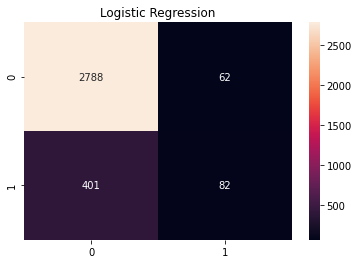

In [43]:
import seaborn as sb
import matplotlib.pyplot as plt

lr_conf = metrics.confusion_matrix(actualY, stratified_kfold(actualX, X_scaled, actualY, linear_model.LogisticRegression))
sb.heatmap(lr_conf, annot=True,  fmt='');
title = "Logistic Regression"
plt.title(title);

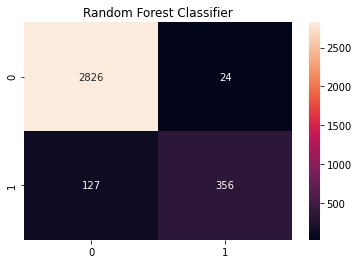

In [44]:
rfc_conf = metrics.confusion_matrix(actualY, stratified_kfold(actualX, X_scaled, actualY, ensemble.RandomForestClassifier))
sb.heatmap(rfc_conf, annot=True,  fmt='');
title = "Random Forest Classifier"
plt.title(title);

From the above two models, the Random Forest Classifier performs better hence the model is selected

Feature Importance

State                     0.023435
Account length            0.031020
Area code                 0.008691
International plan        0.081056
Voice mail plan           0.024415
Number vmail messages     0.022981
Total day minutes         0.144912
Total day calls           0.029513
Total day charge          0.132135
Total eve minutes         0.066135
Total eve calls           0.026119
Total eve charge          0.065140
Total night minutes       0.035710
Total night calls         0.030224
Total night charge        0.035978
Total intl minutes        0.038711
Total intl calls          0.046663
Total intl charge         0.041475
Customer service calls    0.115688
dtype: float64


<AxesSubplot:>

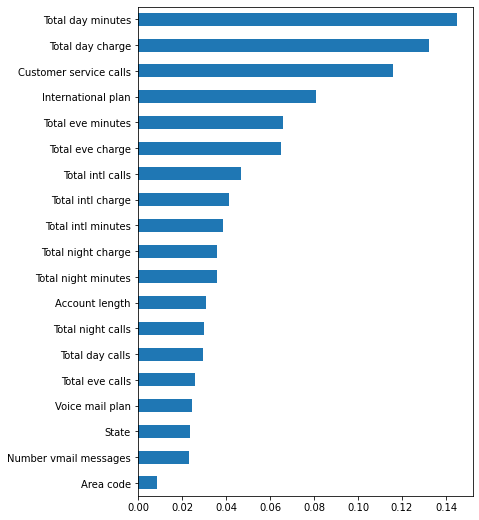

In [45]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_scaled, actualY)
''' 
    rfc.feature_importances_ returns the feature importance
    pd.Series is a 1D labelled array
    ft_imp is a series having feature importance returned by model and labelled/indexed by the column names
'''
ft_imp = pd.Series(rfc.feature_importances_, index = actualX1.columns)
print(ft_imp)
ft_imp = ft_imp.nsmallest(19)
ft_imp.plot(kind='barh', figsize=(6,9)) 